In [2]:
import pygmt 
import pandas as pd
import os,glob
import matplotlib.pyplot as plt
import pickle
from obspy.geodetics.base import gps2dist_azimuth

In [3]:
PATH = '/Volumes/home/Research/STEP/02_Station_result_csv/'
Lithnc = '/Volumes/home/Research/GMT/LithoThickness/LithThickness.nc'
Mohonc = '/Volumes/home/Research/DataBase/01_Armenia/04_Moho_fit_fromCM.nc'
PKLpath = '/Volumes/home/Research/STEP/01_Split'
Resultcsv='/Volumes/home/Research/STEP/05_Station_result_statistics/Station_SK(K)S_2010-2020average_v4.csv'
Volcanocsv='/Volumes/home/Research/DataBase/01_Armenia/02_Volcano_list.csv'
dr = pd.read_csv(Resultcsv)
dv = pd.read_csv(Volcanocsv)

In [4]:
regvals = [40, 47, 39.5, 44.5]
APM = 65

In [5]:
points1 = pygmt.project(center=[41.3, 42], endpoint=[45.7, 40], generate=0.05,unit=True)
# figmap.plot(x=points1.r, y=points1.s, pen="2p,seagreen")

In [6]:
Lithfile = pygmt.grdtrack(points=points1,grid=Lithnc,newcolname="Thickness")
Mohofile = pygmt.grdtrack(points=points1,grid=Mohonc,newcolname="Thickness")

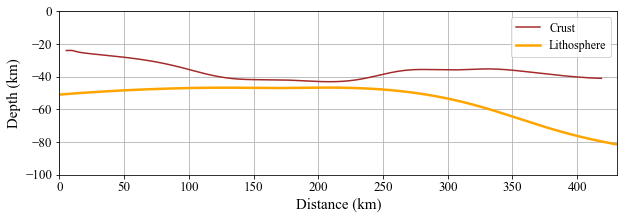

In [13]:
plt.rc('font',family='Times New Roman')
maxdist = max(Mohofile['p'])
plt.figure(figsize=(10,3))
# fig, axs = plt.subplots(4,1,figsize=(10,7),gridspec_kw={'height_ratios': [1, 1.5, 2, 2]})

# plt.subplot(412)
plt.plot(Mohofile['p'],-1*Mohofile['Thickness'],c='brown',label='Crust')
plt.plot(Lithfile['p'],-1*Lithfile['Thickness'],c='orange',lw=2.5,label='Lithosphere')
plt.xlim(0,maxdist)
plt.ylim(-100,0)
# plt.xticks([])
plt.ylabel('Depth (km)', fontsize=15)
plt.xlabel('Distance (km)', fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend(fontsize=12)
# plt.text(x=180,y=-150,s='Asthenosphere',color='r',fontsize=13,ha='center')
# plt.text(x=180,y=-30,s='Crust',color='brown',fontsize=12,ha='center')
plt.grid()


In [33]:
qwq = [0,]

for i in range(0,40):
    
    qqq=Lithfile['Thickness'].values[i*100]
    aaa=Lithfile['Thickness'].values[i*200]
    print(qqq,aaa)
    var=aaa-qqq
    
    qwq.append(var)


50.9625358582 50.9625358582
50.6520362045 50.3530467921
50.3530467921 49.7895112444
50.0655385935 49.2719932052
49.7895112444 48.800624698
49.5249914773 48.3754124424
49.2719932052 47.9962259649
49.0305354709 47.6630894848
48.800624698 47.3766063689
48.5822587864 47.1384617037
48.3754124424 46.9515550615
48.1800735213 46.8195372544
47.9962259649 46.7454025799
47.8238894115 46.7291720505
47.6630894848 46.7646367387
47.5139400553 46.8350260334
47.3766063689 46.9078578111
47.2513377641 46.9343080158
47.1384617037 46.8811865743
47.0383813766 46.7790642499
46.9515550615 46.6932341942
46.8784590763 46.6774547198
46.8195372544 46.7661267724
46.7751322588 46.9811963809
46.7454025799 47.339375259
46.7302464288 47.8567526159
46.7291720505 48.5504304484
46.7411883254 49.4377453276
46.7646367387 50.5343874507
46.7970672137 51.8528995353
46.8350260334 53.4023381771
46.8738984661 55.1881236561
46.9078578111 57.2095430046
46.9300776993 59.4526132187
46.9343080158 61.880617297
46.9173520656 64.4294550

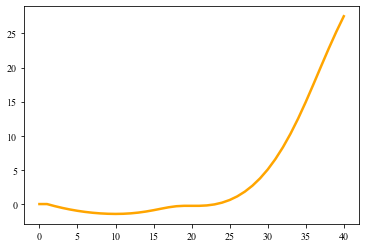

In [34]:
plt.plot(qwq,c='orange',lw=2.5)

In [24]:
len(Lithfile['Thickness'][1:])

8620

In [21]:
Lithfile['Thickness']

0       50.962536
1       50.959374
2       50.956213
3       50.953053
4       50.949894
          ...    
8616    81.526489
8617    81.533532
8618    81.540571
8619    81.547605
8620    81.549133
Name: Thickness, Length: 8621, dtype: float64